In [1]:
#I am interested in exploring more about the VA's Community Living Centers. According to the VA website, 
#A Community Living Center (CLC) is a VA Nursing Home. Veterans may stay for a short time or, 
#in rare instances, for the rest of their life. It is a place where Veterans can receive nursing 
#home level of care, which includes help with activities of daily living and skilled nursing and medical care.
#It is not meant for a long-term stay, but rather as a place for veterans of all ages to live in a home with their
#own room, etc.

#Note: The VA is not a Nonprofit -- it is a government organization. However, it contains lengthy impact reports 
#with data that I believe can be used to better understand how the change in other variables - such as 
#expenditure towards specific services within various departments may affect the number of patients admitted to 
#CLCs, as well as their average length of stay, the CLC's workload, etc. over the years. 
#Through analyzing such data, we may be able to use further findings towards minimizing Veterans' stays in the CLC
#nursing homes, while minimizing finances and workload on the VA

#8.6: I decided to prioritize my RTF data, as I was able to peel more information from their website,
# but I will bring back the data I collected from the VA department later o. Look below


# San Diego Regional Task Force on Homelessness Data Report

**The San Diego Regional Task Force on Homelessness is a nonprofit (officially a 501c3) in San Diego County that 
was originally created by the San Diego Mayor in efforts to better understand the homelessness crisis
Each month, the RTFH publishes a Veteran Placement Report which shows the average inflow and outflow of housing
placement lists, showing matematically how many permanent housement placements are needed each month based on the
outflow (people moving off the list).**



**Data collection avenues** included various reports & schematics made public by The RTFH
- RTFH HMIS Monthly Data reports 
- Monthly Veteran Housing Placement reports
- Annual Data and Performance reports
- Housing Inventory Count (HIC)
- WeAllCount (PIT)

All dashboards with different data sources can be found here: https://www.rtfhsd.org/reports-data/

More specifically, for each month in between September 2022 & June 2024 (excluding some missing values), I have collected the following datapoints:

- Active veterans in RTF Program (per month)
- Total veterans housed (in a given month)
- Total individuals housed (including veterans)
- Individuals newly homeless (in a given month, these are individuals that have not been homeless prior to the month & year of data collection)
- Number of housing placements needed to meet goal (getting everyone fully housed)
- Actual number of people housed
- Number of RTF clients in transitional housing (approx.)
- PIT count data (total number of unsheltered persons counted; total number of unsheltered veterans counted)

I tried to only pick through and peel datapoints that can help give DSA insight on the impact of RTFH's programs on the veteran community, specifically. However, there are lots of other data points showing distinctive data on other demographics too that I reccommend you all check out.

Additionally, I collected Point in Time count (PIT) data from the years 2024 to 2019, which includes the total number of unsheltered persons, as well as the number of unhoused unshelted veterans & unhoused sheletered veterans.



First, I uploaded my Excel sheet in which I collected information as a .csv file into my Jupyter notebook below:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
rtfh_df = pd.read_csv('RTFHDataValues_Revised')

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
rtfh_df.rename(columns={'Number of Housing Placements Needed to Meet Goal based on LR': 'FullVeteranHousingSuccess'}, inplace=True)
rtfh_df.rename(columns={'Actual #': 'ActualVeteranHousingSuccess'}, inplace=True)
display(rtfh_df)

,Year,Month,FullVeteranHousingSuccess,ActualVeteranHousingSuccess,Individuals Newly Homeless (Total),Total Individuals Housed (HMIS Data),Total Veterans Housed,Veterans Active in Program,Number of Clients in Transitional Housing,Unnamed: 9,Unnamed: 10
0,2024,June,314.0,72.0,1172,989,108,4210,867.96,28932,0.03
1,2024,May,234.0,110.0,1324,1065,176,4210,869.34,28978,0.03
2,2024,April,186.0,97.0,1302,967,147,4202,860.01,28667,0.03
3,2024,February,134.0,88.0,1195,1041,150,4158,856.47,28549,0.03
4,2024,January,117.0,76.0,1385,966,132,4142,852.60,28420,0.03
5,2023,December,NaN,NaN,1161,749,96,4103,851.79,28393,0.03
6,2023,November,NaN,NaN,1135,813,131,4050,846.36,28212,0.03
7,2023,October,NaN,NaN,1159,855,121,4024,864.45,28815,0.03
8,2023,September,131.0,67.0,1195,776,100,4005,1141.44,28536,0.04
9,2023,August,117.0,66.0,1475,733,96,3976,843.51,28117,0.03


Unnamed: 9 is the total amount of RTFH service users and Unnamed: 10 is the total percent of RTFH users currently in transitional housing per month

NaN values indicate that RTFH did not have this data on their report for the given month

Let's see the gap between housing placements needed (100% housing rate) and the actual number placed, between September 2022 and June 2024

This, consequently, shows how much the RTFH would need to "up" their monthly placement to meet full demand

### Below, I have redisplayed the dataframe with a visualization at the bottom

,Year,Month,FullVeteranHousingSuccess,ActualVeteranHousingSuccess,Individuals Newly Homeless (Total),Total Individuals Housed (HMIS Data),Total Veterans Housed,Veterans Active in Program,Number of Clients in Transitional Housing,Unnamed: 9,Unnamed: 10
0,2024,June,314.0,72.0,1172,989,108,4210,867.96,28932,0.03
1,2024,May,234.0,110.0,1324,1065,176,4210,869.34,28978,0.03
2,2024,April,186.0,97.0,1302,967,147,4202,860.01,28667,0.03
3,2024,February,134.0,88.0,1195,1041,150,4158,856.47,28549,0.03
4,2024,January,117.0,76.0,1385,966,132,4142,852.60,28420,0.03
5,2023,December,NaN,NaN,1161,749,96,4103,851.79,28393,0.03
6,2023,November,NaN,NaN,1135,813,131,4050,846.36,28212,0.03
7,2023,October,NaN,NaN,1159,855,121,4024,864.45,28815,0.03
8,2023,September,131.0,67.0,1195,776,100,4005,1141.44,28536,0.04
9,2023,August,117.0,66.0,1475,733,96,3976,843.51,28117,0.03


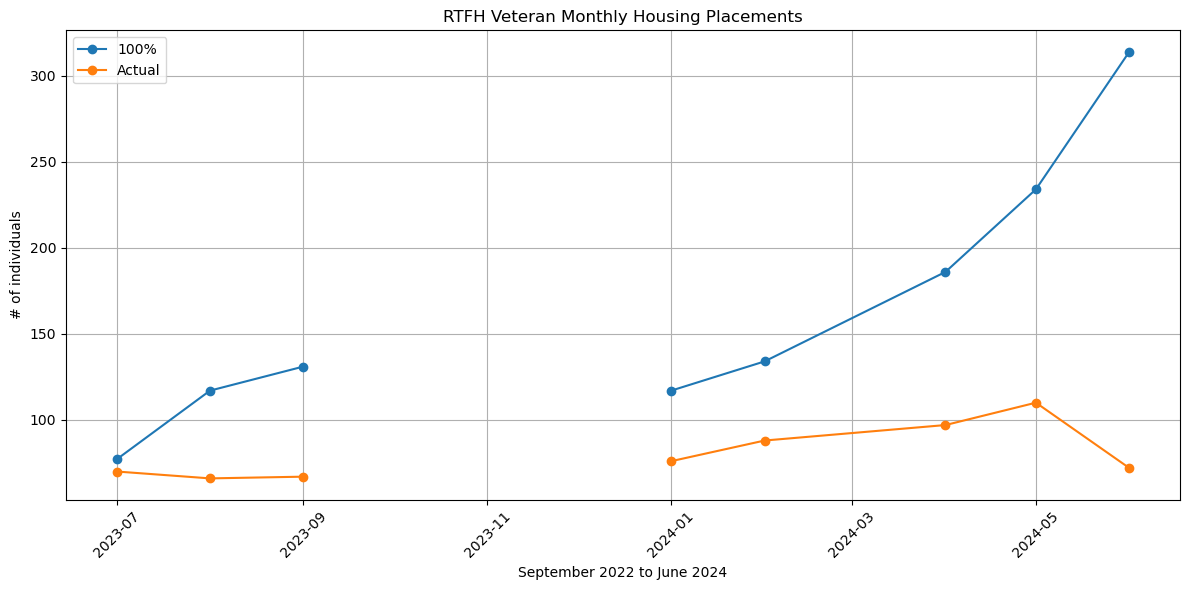

In [6]:
rtfhdf = pd.read_csv('RTFHDataValues_Revised')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
rtfhdf.rename(columns={'Number of Housing Placements Needed to Meet Goal based on LR': 'FullVeteranHousingSuccess'}, inplace=True)
rtfhdf.rename(columns={'Actual #': 'ActualVeteranHousingSuccess'}, inplace=True)
display(rtfhdf)

import pandas as pd
import matplotlib.pyplot as plt

# Map month names to numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
rtfhdf['Month'] = rtfhdf['Month'].map(month_mapping)

# Create a datetime column
rtfhdf['Date'] = pd.to_datetime(rtfhdf[['Year', 'Month']].assign(DAY=1))

# Set the Date column as the index
rtfhdf.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))

plt.plot(rtfhdf.index, rtfhdf['FullVeteranHousingSuccess'], label='100%', marker='o')
plt.plot(rtfhdf.index, rtfhdf['ActualVeteranHousingSuccess'], label='Actual', marker='o')

# Beautify the plot
plt.title('RTFH Veteran Monthly Housing Placements')
plt.xlabel('September 2022 to June 2024')
plt.ylabel('# of individuals')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Now, let's take a look at the number of individuals in a given monthly reporting period that are homeless for the first time, versus the number of individuals in the same month that are placed into housing with the RTFH. Let's also see how many of those that are housed in each month are veterans.

The lower the different between columns as displayed below, the closer RTFH is to maintaining a net 0 change in a given month (just as many people are newly homeless as those that were placed into housing.)

Numbers father away from zero indicate a larger # of people becoming newly homeless, in comparison to the # of unhoused people placed into housing. This may directly increase the amount of unhoused people in San Diego County in a given month.



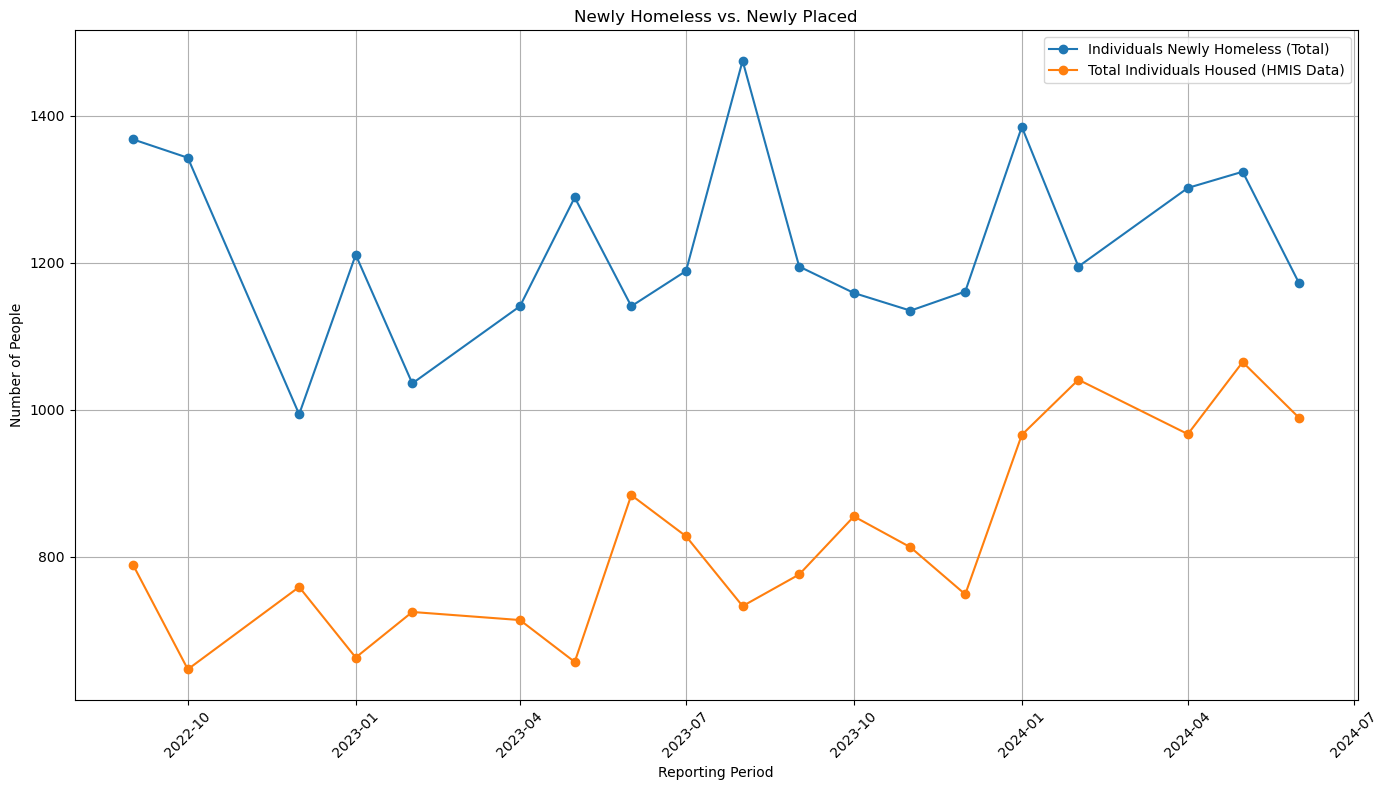

In [7]:

# Convert string values to numeric values
rtfhdf['Individuals Newly Homeless (Total)'] = pd.to_numeric(rtfhdf['Individuals Newly Homeless (Total)'], errors='coerce')
rtfhdf['Total Individuals Housed (HMIS Data)'] = pd.to_numeric(rtfhdf['Total Individuals Housed (HMIS Data)'], errors='coerce')

rtfhdf['Time'] = pd.to_datetime(rtfhdf[['Year', 'Month']].assign(DAY=1))


rtfhdf.sort_values('Time', ascending=True, inplace=True)


plt.figure(figsize=(14, 8))


plt.plot(rtfhdf['Time'], rtfhdf['Individuals Newly Homeless (Total)'], label='Individuals Newly Homeless (Total)', marker='o')


plt.plot(rtfhdf['Time'], rtfhdf['Total Individuals Housed (HMIS Data)'], label='Total Individuals Housed (HMIS Data)', marker='o')


plt.title('Newly Homeless vs. Newly Placed')
plt.xlabel('Reporting Period')
plt.ylabel('Number of People')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Below, I have calculated the numeric value separating each "Newly Homeless" and "Newly Housed" numeric for each reporting period month. A larger number below indicates a greater disparity between those who were marked as newly homeless and those that were marked as newly rehoused.

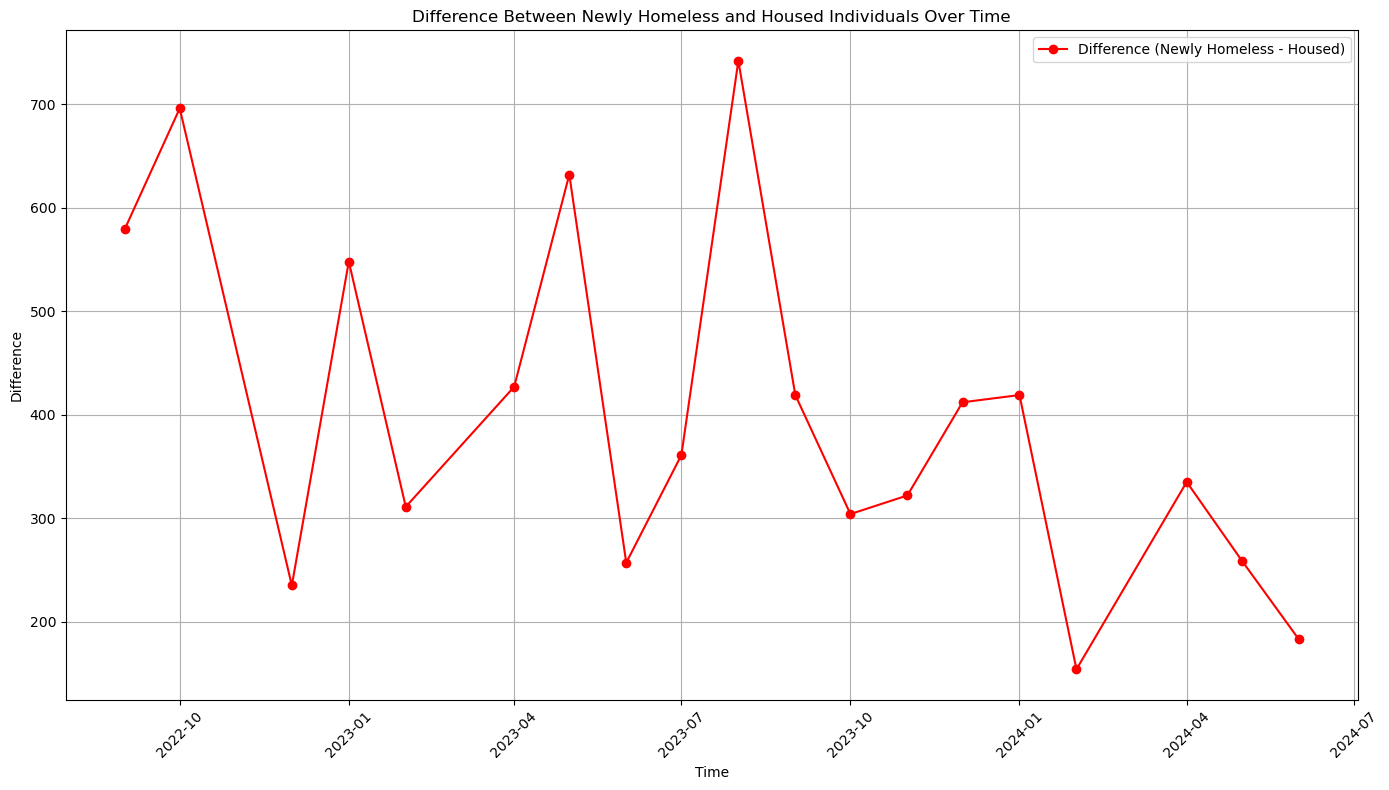

In [8]:
# Convert string values to numeric values
rtfhdf['Individuals Newly Homeless (Total)'] = pd.to_numeric(rtfhdf['Individuals Newly Homeless (Total)'], errors='coerce')
rtfhdf['Total Individuals Housed (HMIS Data)'] = pd.to_numeric(rtfhdf['Total Individuals Housed (HMIS Data)'], errors='coerce')

rtfhdf['Time'] = pd.to_datetime(rtfhdf[['Year', 'Month']].assign(DAY=1))

rtfhdf.sort_values('Time', ascending=True, inplace=True)

rtfhdf['Difference'] = rtfhdf['Individuals Newly Homeless (Total)'] - rtfhdf['Total Individuals Housed (HMIS Data)']

plt.figure(figsize=(14, 8))

plt.plot(rtfhdf['Time'], rtfhdf['Difference'], label='Difference (Newly Homeless - Housed)', marker='o', color='red')

plt.title('Difference Between Newly Homeless and Housed Individuals Over Time')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Now, adding veterans' data into the mix..

The line chart below shows the amount of housing placements (orange) & newly homeless people (blue) in a given month. Now let's compare the amount of new housing placements, versus the proportion of those from this value each month that identify at a veteran

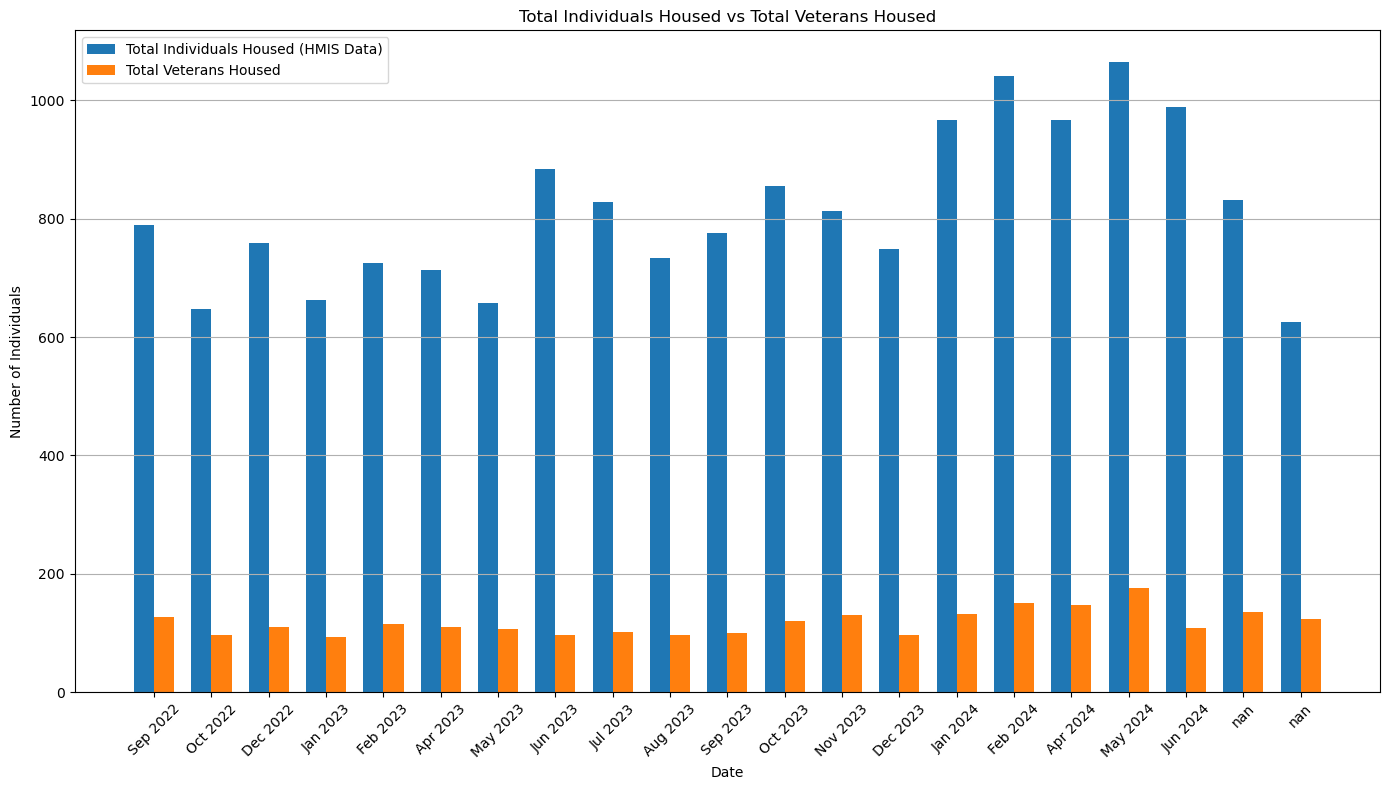

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert string values to numeric values
rtfhdf['Total Individuals Housed (HMIS Data)'] = pd.to_numeric(rtfhdf['Total Individuals Housed (HMIS Data)'], errors='coerce')
rtfhdf['Total Veterans Housed'] = pd.to_numeric(rtfhdf['Total Veterans Housed'], errors='coerce')

# Create a datetime column for plotting
rtfhdf['Time'] = pd.to_datetime(rtfhdf[['Year', 'Month']].assign(DAY=1))

# Sort the DataFrame by time to ensure correct plotting order
rtfhdf.sort_values('Time', ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(14, 8))

bar_width = 0.35
bar_positions = range(len(rtfhdf))

# Plot bars for 'Total Individuals Housed' and 'Total Veterans Housed'
plt.bar(bar_positions, rtfhdf['Total Individuals Housed (HMIS Data)'], width=bar_width, label='Total Individuals Housed (HMIS Data)')
plt.bar([p + bar_width for p in bar_positions], rtfhdf['Total Veterans Housed'], width=bar_width, label='Total Veterans Housed')

# Title and labels
plt.title('Total Individuals Housed vs Total Veterans Housed')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')

# Format x-ticks to show date values
plt.xticks([p + bar_width/2 for p in bar_positions], rtfhdf['Time'].dt.strftime('%b %Y'), rotation=45)

# Add legend and grid for better readability
plt.legend()
plt.grid(axis='y')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


Below shows the numerical proportion of veterans (Orange) that make up the Total Individuals Housed (HMIS Data) (Blue)

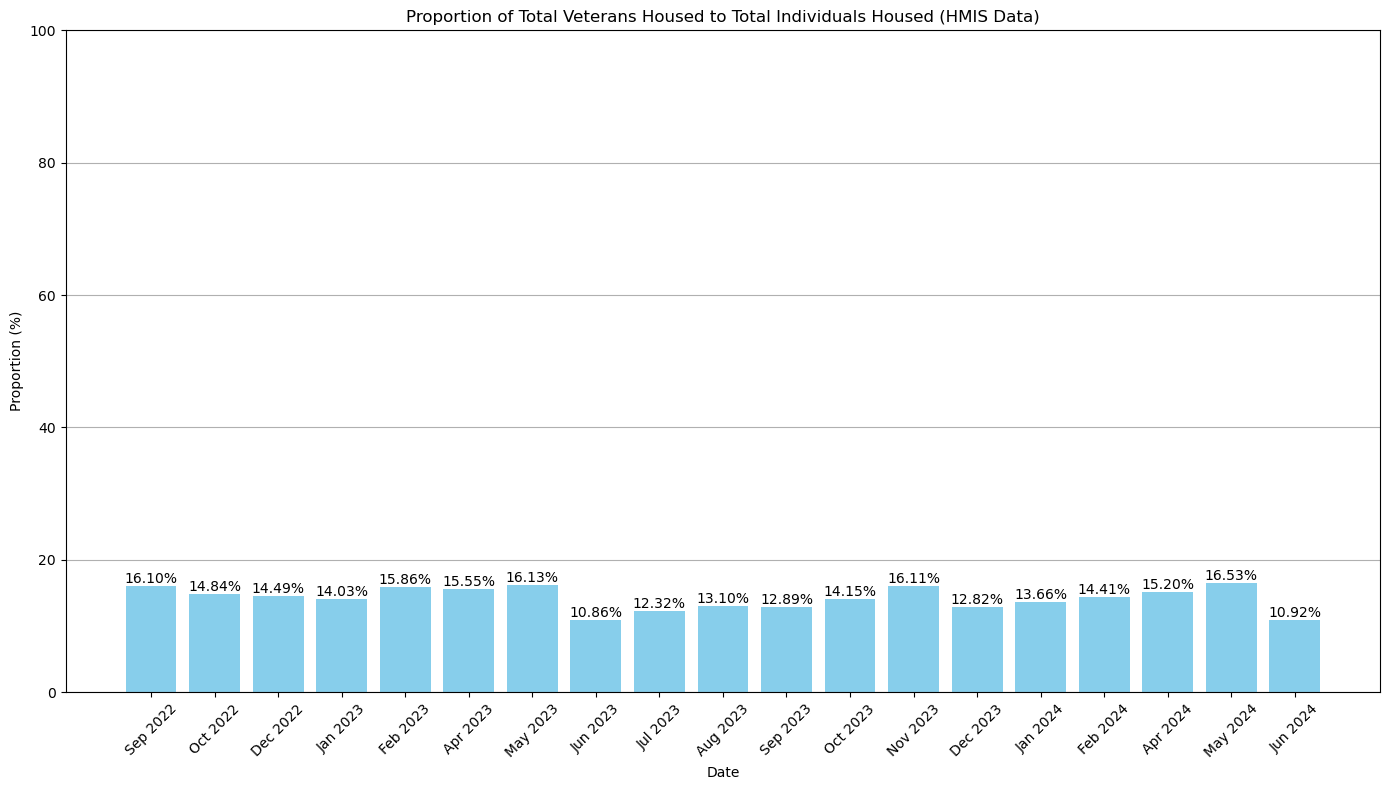

In [10]:
# Convert string values to numeric values
rtfhdf['Total Individuals Housed (HMIS Data)'] = pd.to_numeric(rtfhdf['Total Individuals Housed (HMIS Data)'], errors='coerce')
rtfhdf['Total Veterans Housed'] = pd.to_numeric(rtfhdf['Total Veterans Housed'], errors='coerce')

rtfhdf['Time'] = pd.to_datetime(rtfhdf[['Year', 'Month']].assign(DAY=1), errors='coerce')

rtfhdf = rtfhdf.dropna(subset=['Time'])

rtfhdf.sort_values('Time', ascending=True, inplace=True)

rtfhdf['Proportion'] = (rtfhdf['Total Veterans Housed'] / rtfhdf['Total Individuals Housed (HMIS Data)']) * 100

rtfhdf['Date_str'] = rtfhdf['Time'].dt.strftime('%b %Y')

plt.figure(figsize=(14, 8))


bars = plt.bar(rtfhdf['Date_str'], rtfhdf['Proportion'], color='skyblue')


for bar, proportion in zip(bars, rtfhdf['Proportion']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{proportion:.2f}%', ha='center', va='bottom')

# Beautify the plot
plt.title('Proportion of Total Veterans Housed to Total Individuals Housed (HMIS Data)')
plt.xlabel('Date')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


This means that -- for example -- 16.1% of individuals newly housed in September 2022 were veterans

The RTFH also includes the total amount of clients (individuals) serviced during a given month in one impact report, as well as the number of veterans serviced specifically in these same months -- contained in another impact report they published. Let's see what proportion of individuals serviced by the RTFH are veterans.

Note: There can be repeated individuals across multiple months (as this is not the number of new clients serviced, just total)

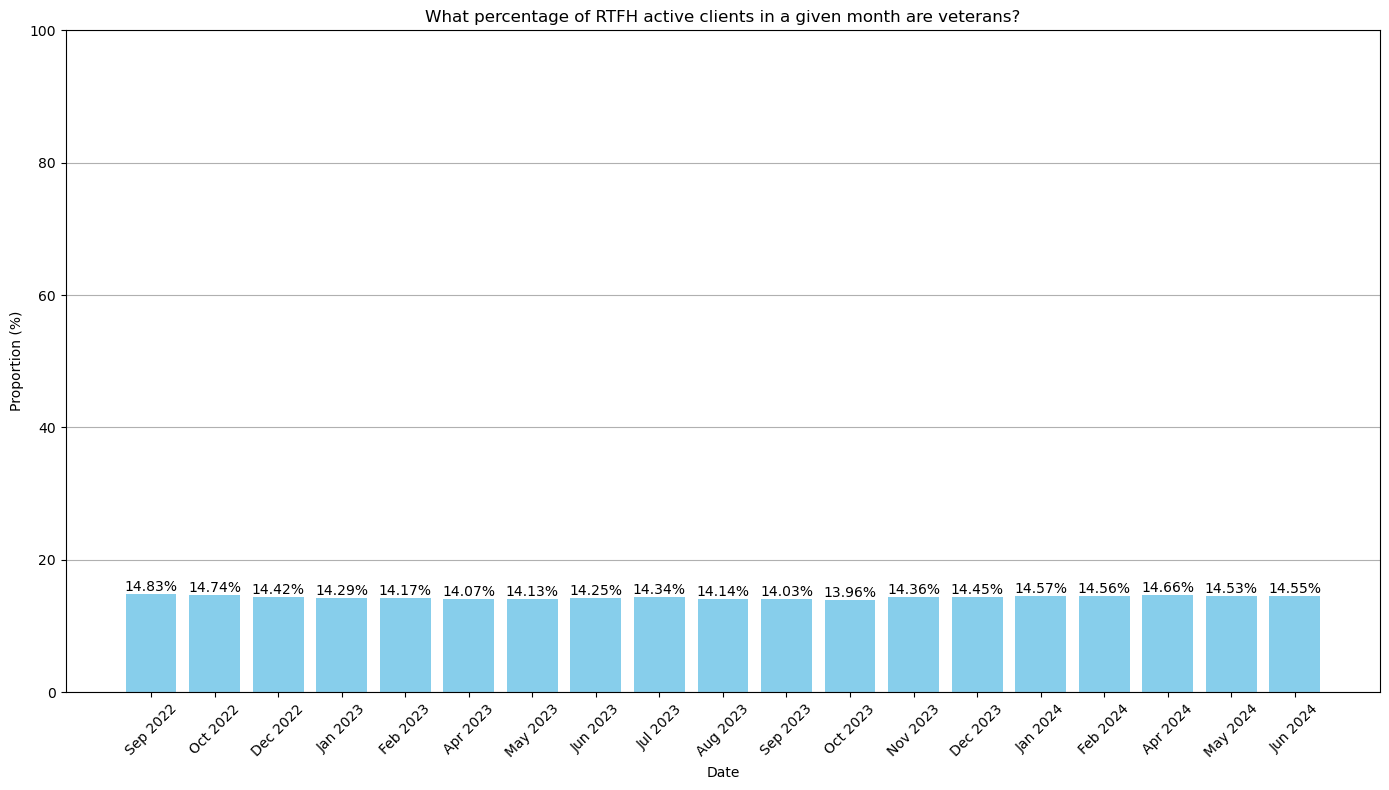

In [11]:
# Convert string values to numeric values
rtfhdf['Unnamed: 9'] = pd.to_numeric(rtfhdf['Unnamed: 9'], errors='coerce')
rtfhdf['Veterans Active in Program'] = pd.to_numeric(rtfhdf['Veterans Active in Program'], errors='coerce')

rtfhdf['Time'] = pd.to_datetime(rtfhdf[['Year', 'Month']].assign(DAY=1), errors='coerce')

rtfhdf = rtfhdf.dropna(subset=['Time'])

rtfhdf.sort_values('Time', ascending=True, inplace=True)

rtfhdf['Proportion'] = (rtfhdf['Veterans Active in Program'] / rtfhdf['Unnamed: 9']) * 100

rtfhdf['Date_str'] = rtfhdf['Time'].dt.strftime('%b %Y')

plt.figure(figsize=(14, 8))


bars = plt.bar(rtfhdf['Date_str'], rtfhdf['Proportion'], color='skyblue')


for bar, proportion in zip(bars, rtfhdf['Proportion']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{proportion:.2f}%', ha='center', va='bottom')

# Beautify the plot
plt.title('What percentage of RTFH active clients in a given month are veterans?')
plt.xlabel('Date')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


The data above means that, for example, 14.13% of RTFH's active clients in May 2023 identified as a veteran

# 2-1-1 San Diego Data Report

### 2-1-1 versus RTFH

##### 2-1-1 San Diego and RTFH both play important roles in San Diego, but with different focuses. 2-1-1 San Diego acts as a comprehensive resource hub, providing free, confidential referrals to a wide range of community services, including housing, healthcare, and food assistance. In contrast, RTFH focuses specifically on homelessness, coordinating regional efforts, managing data through the Homeless Management Information Systems (HMIS), and leading strategic planning to reduce homelessness. While 2-1-1 connects individuals to immediate support, RTFH leads long-term, data-driven initiatives to address homelessness.

The data collected below has been cleaned & imported as a .csv file into the Jupyter notebook. More specifically, this data has been requested by DSA through a key contact from the organization. In other words, this is not publicly available data (2-1-1 has limitied public data.) 



### Here is a guide to the data per 2-1-1:
- The data given to DSA was downloaded on October 5th, 2022
- The *Emergency Needs Counts* Data summarizes counts of referrals associated to Nutrition Needs by year, month, and zip code at the most granular level within Needs descriptions. According to 2-1-1, a client can call in a given month multiple times for the same Need. Therefore, by counting referrals, a client can be double counted in a given month within the same need
- The *Military & Veteran Client Count* as well as *Homeless Client Count*, are categorized as demographic tabs, summarizing counts of unique clients with a Nutrition Need by year, month, and zip code, by a demographic variable
- Similar to the Emergency Needs Count, Demographics were summarized by using Referral date and unique counts of clients. Therefore, only clients that had a referral are included in the counts. Clients may have had referrals on multiple years/months, therefore, they can be double counted in multiple time periods


#### Important note for consideration:
Collection of data contributing to a client's homeless status has changed year over year, with sources of data increasing over time (including documentation by 211 staff and CIE partner data integration). This may cause bias in the percentage of clients that report experiencing homelessness year over year

### I have separated data into six different sheets of three different categories:
- Emergency Needs Counts (dataset #1 & #2) 
- Military & Veteran Client Count (dataset #1 & #2) 
- Homeless Client Count (dataset #1 & #2) 

Each dataset has been reformatted/cleaned for consistency. We will start by importing the datasets as .csv files, merging the respective datasets #1 and #2, so we will have three different datasets now instead of six

In [12]:
Emergency_Needs_1_df = pd.read_csv('Emergency_Needs_Count_1')
Emergency_Needs_2_df = pd.read_csv('Emergency_Needs_Count_2')
Homeless_Counts_1_df = pd.read_csv('Homeless_Count_1')
Homeless_Counts_2_df = pd.read_csv('Homeless_Count_2')
VeteranMilitary_Counts_1_df = pd.read_csv('Military_Veteran_Count_1')
VeteranMilitary_Counts_2_df = pd.read_csv('Military_Veteran_Count_2')

## Emergency Services Referral Data: 2-1-1

In [13]:
# Combine the Emergency Needs dataframes and display the first ten values
Emergency_Needs_df = pd.concat([Emergency_Needs_1_df, Emergency_Needs_2_df], ignore_index=True)
display(Emergency_Needs_df .head(10))


,Year,Month,Zip,Service Category,Count of Referrals
0,2018,Jan,NaN,Emergency Food,2
1,2018,Jan,NaN,Food Collection and Storage,3
2,2018,Jan,NaN,Emergency Food,14
3,2018,Jan,67337.0,Nutrition Related Public Assistance Programs,1
4,2018,Jan,NaN,EBT Card Services,257
5,2018,Jan,NaN,Meals,23
6,2018,Jan,NaN,Emergency Food,46
7,2018,Jan,NaN,Emergency Food,5
8,2018,Jan,NaN,Meals,4
9,2018,Jan,NaN,Meals,42


## Homeless Counts Referral Data: 2-1-1

In [14]:
# Combine the Homeless Counts dataframes and display the first ten values
Homeless_Counts_df = pd.concat([Homeless_Counts_1_df, Homeless_Counts_1_df], ignore_index=True)
display(Homeless_Counts_df .head(10))


,Year,Month,Zip,Homeless Status,Count of Clients
0,2018,Jan,NaN,Yes,17
1,2018,Jan,91911.0,Missing,64
2,2018,Jan,NaN,No,7
3,2018,Jan,67337.0,Missing,1
4,2018,Jan,91913.0,Missing,14
5,2018,Jan,75032.0,Missing,1
6,2018,Jan,NaN,Missing,585
7,2018,Jan,67337.0,Yes,1
8,2018,Jan,91909.0,Yes,2
9,2018,Jan,91913.0,No,2


## Veteran & Military Referral Data: 2-1-1

In [15]:
# Combine the Veteran/Military Counts dataframes and display the first ten values
Military_Counts_df = pd.concat([VeteranMilitary_Counts_1_df, VeteranMilitary_Counts_2_df], ignore_index=True)
display(Military_Counts_df .head(10))

,Year,Month,Zip,Military or Veteran Status,Count of Clients,Yes
0,2018,Jan,91912.0,No,1,NaN
1,2018,Jan,67337.0,No,1,NaN
2,2018,Jan,91909.0,No,2,NaN
3,2018,Jan,67337.0,NaN,1,NaN
4,2018,Jan,91906.0,Yes,1,NaN
5,2018,Jan,NaN,NaN,548,NaN
6,2018,Jan,NaN,Yes,6,NaN
7,2018,Jan,NaN,No,55,NaN
8,2018,Jan,91914.0,No,2,NaN
9,2018,Jan,74103.0,NaN,1,NaN


### Now, let's take a look at the amount of different emergency services provided (by referral counts) for each year, between 2018 and 2022.

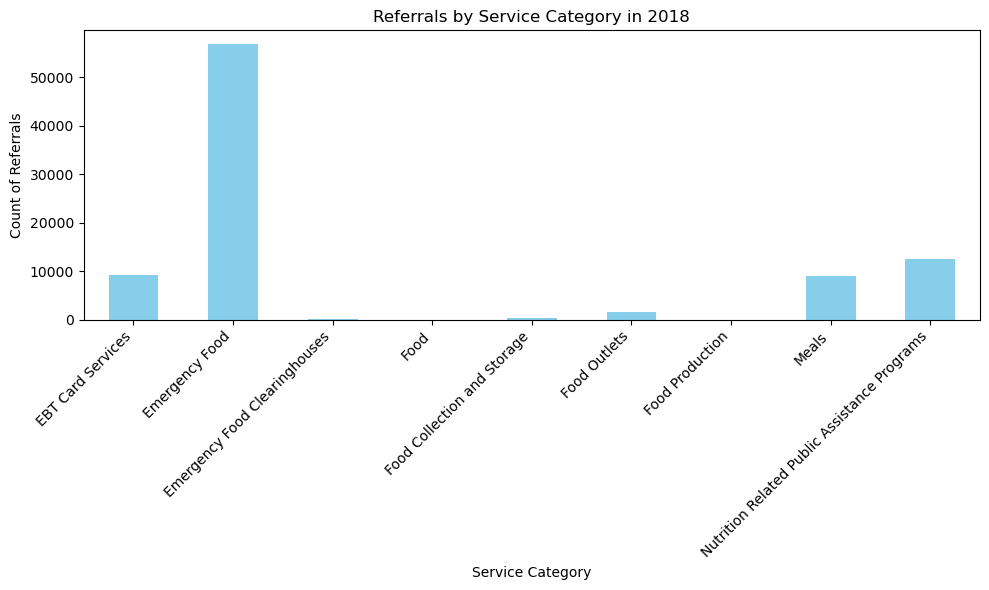

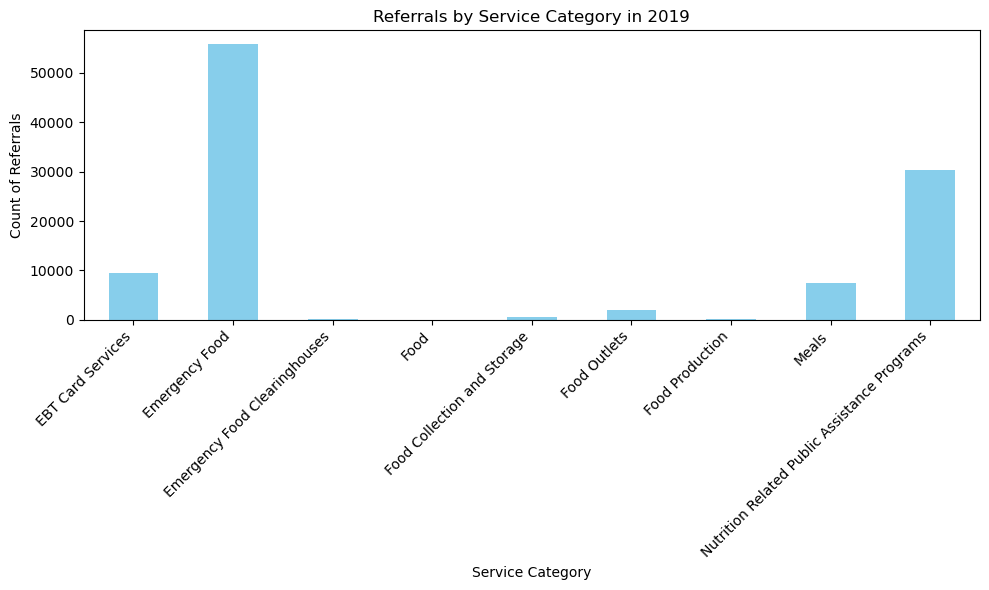

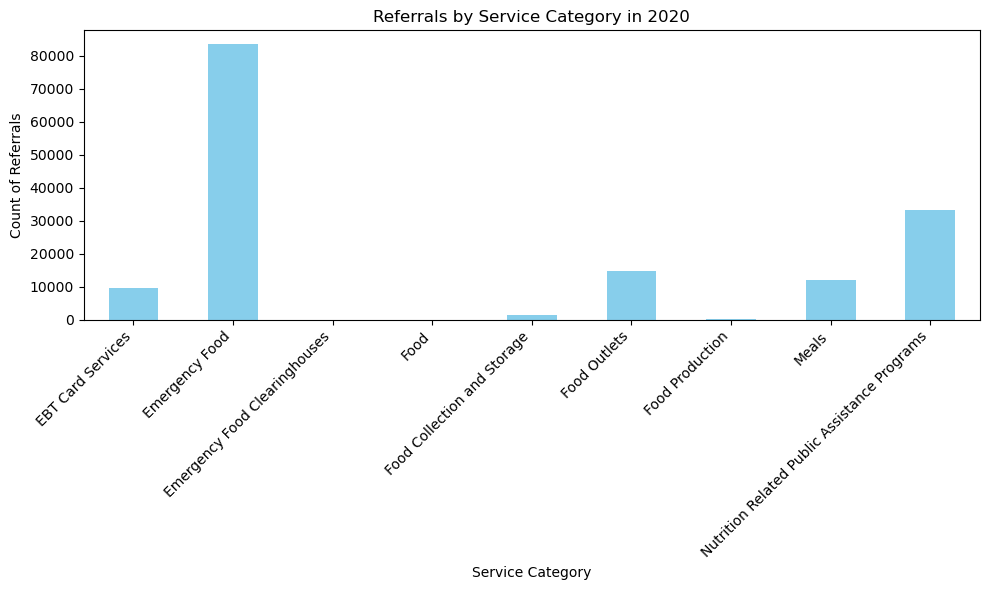

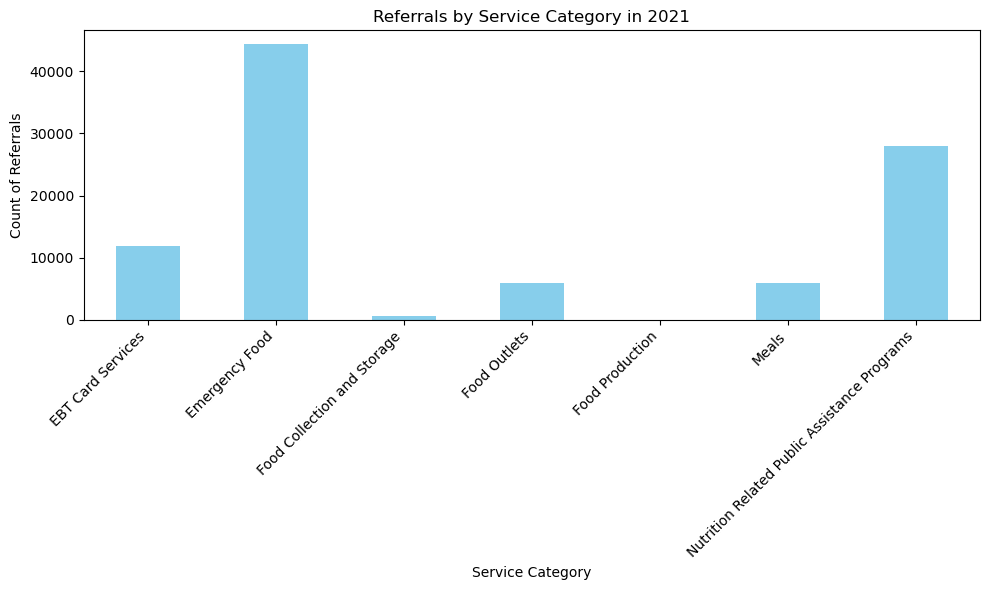

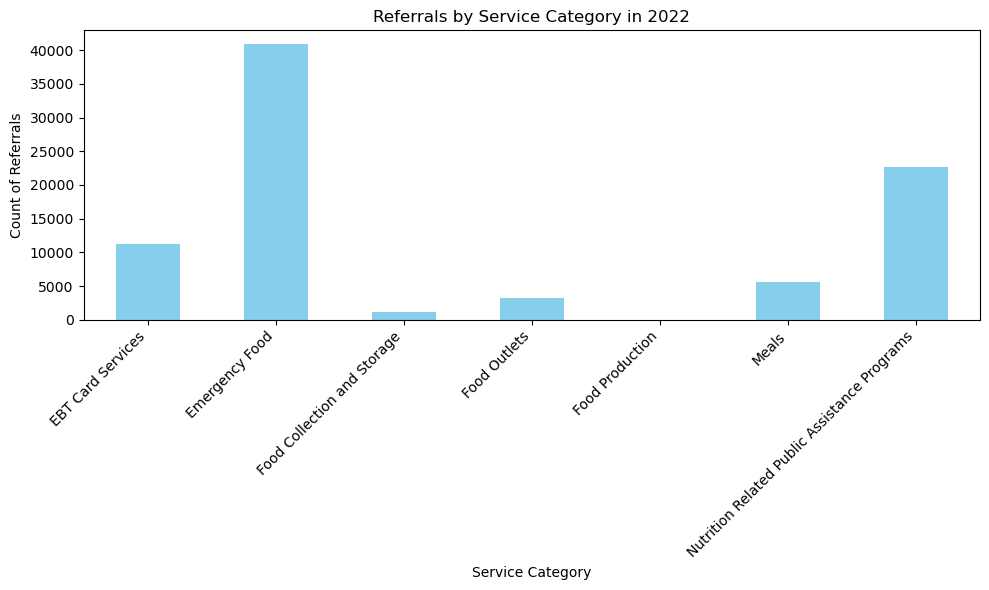

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Loop over each year from 2018 to 2022
for year in range(2018, 2023):
    # Filter the DataFrame for the specific year
    df_year = Emergency_Needs_df[Emergency_Needs_df['Year'] == year]
    
    # Group by Service Category and sum the Count of Referrals
    service_counts = df_year.groupby('Service Category')['Count of Referrals'].sum()
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    service_counts.plot(kind='bar', color='skyblue')
    
    # Add titles and labels
    plt.title(f'Referrals by Service Category in {year}')
    plt.xlabel('Service Category')
    plt.ylabel('Count of Referrals')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Display the plot
    plt.tight_layout()
    plt.show()


From these results, it seems as though emergency food has been the resource with the most referrals for all four years.

### Now, let's work on displaying the data on those with military & veteran status that use the 2-1-1 programs. We have data on clients in a certain zip code, & whether they hold military/veteran status or not. I am treating all Null values as N/A, meaning that 2-1-1 San Diego did not collect those specific data points.

In [29]:
# Count unique values in column 'A'
unique_values_A = Military_Counts_df['Zip'].nunique()
print(f"Number of unique values in column 'Zip': {unique_values_A}")


Number of unique values in column 'Zip': 646


Why are there 645 different zip codes? LOL 
### I will first filter out all the Zip Codes that are not in San Diego County

In [30]:
import pandas as pd

zip_file_path = 'San_Diego_Zip_Codes'# Load the CSV file into a DataFrame
zip_df = pd.read_csv(zip_file_path)


zip_df.head()



,Zip_Code
0,91911
1,92154
2,92592
3,91910
4,92126


In [31]:
zip_df['Zip_Code'] = zip_df['Zip_Code'].astype(str)
Military_Counts_df['Zip'] = Military_Counts_df['Zip'].astype(str)

In [32]:
import pandas as pd

zip_df['Zip_Code'] = zip_df['Zip_Code'].astype(str)
Military_Counts_df['Zip'] = Military_Counts_df['Zip'].astype(str)
# Sample DataFrames (replace these with your actual DataFrames)# zip_df = pd.read_csv('path_to_zip_df.csv')# Military_Counts_df = pd.read_csv('path_to_military_counts_df.csv')# Ensure the column names match exactly with your DataFrames# zip_df has a column 'Zip_Code' and Military_Counts_df has a column 'Zip'# Convert 'Zip_Code' and 'Zip' columns to a set for faster lookup
zip_codes = set(zip_df['Zip_Code'].astype(str))


# Filter Military_Counts_df to only include rows with Zip codes in zip_codes
filtered_df = Military_Counts_df[Military_Counts_df['Zip'].astype(str).isin(zip_codes)]

# Calculate the number of rows removed
rows_before = len(Military_Counts_df)
rows_after = len(filtered_df)
rows_removed = rows_before - rows_after

# Display the filtered DataFrame and the number of rows removedprint("Filtered DataFrame:")
print(filtered_df.head())  # Display the first few rows of the filtered DataFrameprint(f"\nNumber of rows removed: {rows_removed}")


Empty DataFrame
Columns: [Year, Month, Zip, Military or Veteran Status, Count of Clients, Yes]
Index: []


In [33]:
print(zip_df['Zip_Code'].dtype)
print(Military_Counts_df['Zip'].dtype)


object
object


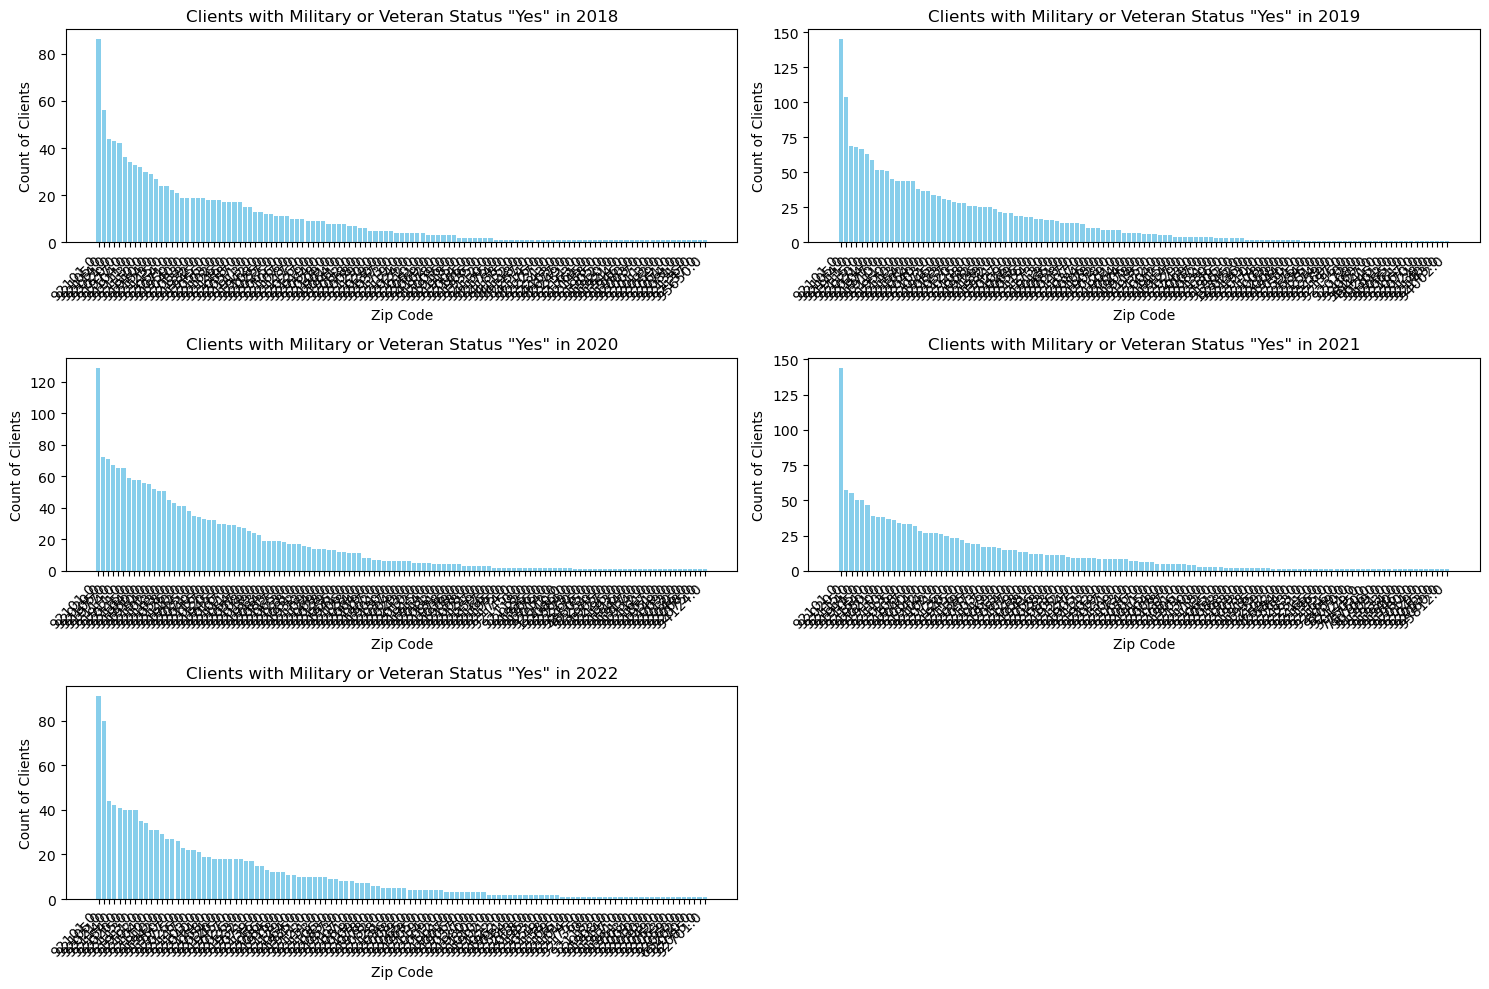

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


Military_Counts_df['Year'] = Military_Counts_df['Year'].astype(int)

military_df = Military_Counts_df[Military_Counts_df['Military or Veteran Status'] == 'Yes']

years = [2018, 2019, 2020, 2021, 2022]

plt.figure(figsize=(15, 10))

for year in years:
    year_df = military_df[military_df['Year'] == year]
    
    zip_counts = year_df.groupby('Zip')['Count of Clients'].sum().reset_index()
    
    zip_counts = zip_counts.sort_values(by='Count of Clients', ascending=False)
    
    plt.subplot(3, 2, years.index(year) + 1)
    plt.bar(zip_counts['Zip'].astype(str), zip_counts['Count of Clients'], color='skyblue')
    plt.xlabel('Zip Code')
    plt.ylabel('Count of Clients')
    plt.title(f'Clients with Military or Veteran Status "Yes" in {year}')
    plt.xticks(rotation=45, ha='right')
    
plt.tight_layout()
plt.show()



# Next Steps/The "Why"

By not only collecting & synthesizing official data from The RTFH, with a spotlight on veterans' impact, but also visualizing it in this notebook, DSA can be better equipt to understand & explain to others the current magnitude of San Diego County's homelessness problem.

Below is a collection of "news/media hits", aka local (San Diego County) policy proposals or enactments related to relieving the homelessness crisis in our community. The hits below are not only interesting to see lined up next to the data visualization, but they also served as a great speaking starting point for Mehri and her County contacts, as all the individuals Mehri has spoken to have been in the loop with at least occurence below, and it gave her the opportunity to see how lawmakers enact policy in respond to data, or lack thereof.

Additionally, with the homelessness project, our goal in the long run is to see if we can develop a predictive model that allocates limited resources -- like, for example, the resources in RTFH's programs -- to the unhoused population. Collecting and analyzing public data before beginning a project in full-force allows us to, for example, see how efficient the current budget of RTFH's Veteran program (money = limited resource) is towards long-run housing placement for veterans. Using what is currently being done, and what has been done (Sept. 2022 to June 2024) as a baseline will allow us to see how our predictive model, for example, could help RTFH strengthen its budgetting by allocating appropriate funds to the most effective program(s) (features) that show to improve the life of unhoused veterans based on data now versus after model implementation.

### To try and gain a deeper understanding of the data points above, we can look at policy implementations between 2021 to now, to see if there is a correlation between a new law, expansion, or restriction & the amount of RTFH clients

Mehri peeled through Google to try and find any law enacments, budget allocations, program launches, etc., that target unhoused populations, with an emphasis on veterans' support. Let's begin by uploading the .csv file.

In [35]:
#imported Pandas alr at top
pd.set_option('display.max_colwidth', None)
mediadf = pd.read_csv('Media_Hits_8.15')
mediadf


,"Month, Date",Summary,Link,Unnamed: 3
0,"October, 2015",Renovation Of San Diego Homeless Veteran Shelter Celebrated,https://www.kpbs.org/news/evening-edition/2015/10/09/completion-homeless-veteran-shelter-celebrated,NaN
1,"February, 2016","We’ll House 1,000 Homeless Veterans by Year’s End, Officials Say",https://timesofsandiego.com/politics/2016/02/03/well-house-1000-homeless-veterans-by-years-end-officials-say/,https://www.sdhc.org/uploadedFiles/Housing_Innovations/Housing_First/1000%20Homeless%20Veterans%20Initiative%20Special%20Report.pdf
2,"December, 2017","Affirmed Opens New Southern California Community for Low-Income Families, Vets",https://www.housingfinance.com/developments/affirmed-opens-new-southern-california-community-for-low-income-families-vets_o,NaN
3,"June, 2019",VA launches new health care options under MISSION Act,https://news.va.gov/press-room/va-launches-new-health-care-options-under-mission-act/,NaN
4,"February, 2022",St. Teresa of Calcutta Villa Brings 400 Affordable Housing Units Downtown,https://www.countynewscenter.com/st-teresa-of-calcutta-villa-brings-400-affordable-housing-units-downtown/,NaN
5,"September, 2022",New Affordable Housing Development Welcomes Artists and Veterans in Vista\r,https://www.countynewscenter.com/new-affordable-housing-development-welcomes-artists-and-veterans-in-vista/,NaN
6,September 2022,Alpha Project's new 150-bed shelter opens in the midway district with 24-hour COSD mental health resources,https://www.nbcsandiego.com/news/local/new-homeless-shelter-with-accessible-mental-health-resources-opens-in-midway-district/3045265/,NaN
7,"December, 2022",Local Government Officials Praise New ‘Safe Haven’ Shelter at Veterans Village,https://timesofsandiego.com/life/2022/12/15/local-government-officials-praise-new-safe-haven-shelter-at-veterans-village/#google_vignette,NaN
8,January 2023,The County of San Diego launches the Leave No Veteran Homeless Initiative led by the County's Department of Homeless Solutions and Equitable Communties,https://www.countynewscenter.com/county-launches-leave-no-veteran-homeless-initiative/,NaN
9,March 2023,"Governor Newson announces $1 Billion in homelessness funding, launches state's largest mobilization of small homes, in which the state delivered 1,200 small homes to Los Angeles, San Diego \nCounty, San Jose & Sacramento to provide interim housing to those experiencing homelessness",https://www.gov.ca.gov/2023/03/16/governor-newsom-announces-1-billion-in-homelessness-funding-launches-states-largest-mobilization-of-small-homes/,NaN


To help us better classify these sources, I will add a column to classify each piece with a few key words

In [36]:
mediadf['Key Words'] = ""
mediadf

,"Month, Date",Summary,Link,Unnamed: 3,Key Words
0,"October, 2015",Renovation Of San Diego Homeless Veteran Shelter Celebrated,https://www.kpbs.org/news/evening-edition/2015/10/09/completion-homeless-veteran-shelter-celebrated,NaN,
1,"February, 2016","We’ll House 1,000 Homeless Veterans by Year’s End, Officials Say",https://timesofsandiego.com/politics/2016/02/03/well-house-1000-homeless-veterans-by-years-end-officials-say/,https://www.sdhc.org/uploadedFiles/Housing_Innovations/Housing_First/1000%20Homeless%20Veterans%20Initiative%20Special%20Report.pdf,
2,"December, 2017","Affirmed Opens New Southern California Community for Low-Income Families, Vets",https://www.housingfinance.com/developments/affirmed-opens-new-southern-california-community-for-low-income-families-vets_o,NaN,
3,"June, 2019",VA launches new health care options under MISSION Act,https://news.va.gov/press-room/va-launches-new-health-care-options-under-mission-act/,NaN,
4,"February, 2022",St. Teresa of Calcutta Villa Brings 400 Affordable Housing Units Downtown,https://www.countynewscenter.com/st-teresa-of-calcutta-villa-brings-400-affordable-housing-units-downtown/,NaN,
5,"September, 2022",New Affordable Housing Development Welcomes Artists and Veterans in Vista\r,https://www.countynewscenter.com/new-affordable-housing-development-welcomes-artists-and-veterans-in-vista/,NaN,
6,September 2022,Alpha Project's new 150-bed shelter opens in the midway district with 24-hour COSD mental health resources,https://www.nbcsandiego.com/news/local/new-homeless-shelter-with-accessible-mental-health-resources-opens-in-midway-district/3045265/,NaN,
7,"December, 2022",Local Government Officials Praise New ‘Safe Haven’ Shelter at Veterans Village,https://timesofsandiego.com/life/2022/12/15/local-government-officials-praise-new-safe-haven-shelter-at-veterans-village/#google_vignette,NaN,
8,January 2023,The County of San Diego launches the Leave No Veteran Homeless Initiative led by the County's Department of Homeless Solutions and Equitable Communties,https://www.countynewscenter.com/county-launches-leave-no-veteran-homeless-initiative/,NaN,
9,March 2023,"Governor Newson announces $1 Billion in homelessness funding, launches state's largest mobilization of small homes, in which the state delivered 1,200 small homes to Los Angeles, San Diego \nCounty, San Jose & Sacramento to provide interim housing to those experiencing homelessness",https://www.gov.ca.gov/2023/03/16/governor-newsom-announces-1-billion-in-homelessness-funding-launches-states-largest-mobilization-of-small-homes/,NaN,


To help us better grasp policy implications on the homeless community, let's create a word key and put them in the respective column/data frame above.

In [39]:
keywords = [
    "New Shelter (NS)","New Shelter (NS), County/City Initiative (CCI)", "New Shelter (NS), Veteran Impact (VI)",
    "Veteran Impact (VI), Mental Health Resource (MHR)", "New Shelter (NS)", "New Shelter (NS), Mental Health Resource (MHR)",
    "Shelter Shelter (NS), County/City Iniative (CCI)", "County/City Iniative (CCI), Veteran Impact (VI), Transitional Housing (TH)", 
    "County/City Initiative (CCI), Veteran Impact (VI)", "State Initiative (SI), Increased Funding (IF), New Shelter (NS)",
    "Mental Health Resource (MHR), State Initiative (SI)", "Transitional Housing (TH), Veteran Impact (VI)", "Veteran Impact (VI), County/City Initiative (CCI), New Shelter (NS)",
    "Veteran Impact (VI), Mental Health Resources (MHR)", "Veteran Impact (VI)", "New Shelter (NS), Transitional Housing (TH)",
    "Restriction (R)"
]

# Update the "Key Words" column for the first 7 rows
mediadf.loc[:20, 'Key Words'] = keywords

# Display the DataFrame to verify the changes
mediadf.head(10)  # Display the first 10 rows to see the updates

,"Month, Date",Summary,Link,Unnamed: 3,Key Words
0,"October, 2015",Renovation Of San Diego Homeless Veteran Shelter Celebrated,https://www.kpbs.org/news/evening-edition/2015/10/09/completion-homeless-veteran-shelter-celebrated,NaN,New Shelter (NS)
1,"February, 2016","We’ll House 1,000 Homeless Veterans by Year’s End, Officials Say",https://timesofsandiego.com/politics/2016/02/03/well-house-1000-homeless-veterans-by-years-end-officials-say/,https://www.sdhc.org/uploadedFiles/Housing_Innovations/Housing_First/1000%20Homeless%20Veterans%20Initiative%20Special%20Report.pdf,"New Shelter (NS), County/City Initiative (CCI)"
2,"December, 2017","Affirmed Opens New Southern California Community for Low-Income Families, Vets",https://www.housingfinance.com/developments/affirmed-opens-new-southern-california-community-for-low-income-families-vets_o,NaN,"New Shelter (NS), Veteran Impact (VI)"
3,"June, 2019",VA launches new health care options under MISSION Act,https://news.va.gov/press-room/va-launches-new-health-care-options-under-mission-act/,NaN,"Veteran Impact (VI), Mental Health Resource (MHR)"
4,"February, 2022",St. Teresa of Calcutta Villa Brings 400 Affordable Housing Units Downtown,https://www.countynewscenter.com/st-teresa-of-calcutta-villa-brings-400-affordable-housing-units-downtown/,NaN,New Shelter (NS)
5,"September, 2022",New Affordable Housing Development Welcomes Artists and Veterans in Vista\r,https://www.countynewscenter.com/new-affordable-housing-development-welcomes-artists-and-veterans-in-vista/,NaN,"New Shelter (NS), Mental Health Resource (MHR)"
6,September 2022,Alpha Project's new 150-bed shelter opens in the midway district with 24-hour COSD mental health resources,https://www.nbcsandiego.com/news/local/new-homeless-shelter-with-accessible-mental-health-resources-opens-in-midway-district/3045265/,NaN,"Shelter Shelter (NS), County/City Iniative (CCI)"
7,"December, 2022",Local Government Officials Praise New ‘Safe Haven’ Shelter at Veterans Village,https://timesofsandiego.com/life/2022/12/15/local-government-officials-praise-new-safe-haven-shelter-at-veterans-village/#google_vignette,NaN,"County/City Iniative (CCI), Veteran Impact (VI), Transitional Housing (TH)"
8,January 2023,The County of San Diego launches the Leave No Veteran Homeless Initiative led by the County's Department of Homeless Solutions and Equitable Communties,https://www.countynewscenter.com/county-launches-leave-no-veteran-homeless-initiative/,NaN,"County/City Initiative (CCI), Veteran Impact (VI)"
9,March 2023,"Governor Newson announces $1 Billion in homelessness funding, launches state's largest mobilization of small homes, in which the state delivered 1,200 small homes to Los Angeles, San Diego \nCounty, San Jose & Sacramento to provide interim housing to those experiencing homelessness",https://www.gov.ca.gov/2023/03/16/governor-newsom-announces-1-billion-in-homelessness-funding-launches-states-largest-mobilization-of-small-homes/,NaN,"State Initiative (SI), Increased Funding (IF), New Shelter (NS)"


### Update 8/15: Please add any more media hits directly on the Jupyter notebook, and use the key below:

#### Categories:
- New Shelter (NS)
- Mental Health Resource (MHR)
- County/City Initiative (CCI)
- Veteran Impact (VI)
- State Initiative (SI)
- Increased Funding (IF)
- Transitional Housing (TS)
- Restriction (R)

Instructions: For each dataframe value in the df 0-6, Add the following values in "Key Words", starting from top to bottom, with semicolons separating values in each of the 7 different rows: New shelter (NS), Mental health resource (MHR); County/City initiative (CCI), Veteran Impact (VI); State Initiative (SI), Increased Funding (IF), New Shelter (NS); Mental Health Resource (MHR), State Initiative (SI); Transitional Housing (TH), Veteran Impact (VI); Veteran Impact (VI), County/City Initiative (CCI), New Shelter (NS); Restriction (R)


#### Now, by collecting and categorizing the media hits, we can align the month in which the new initiative, for example, was ratified, alongside RTFH's veteran data, in order to see if there is a direct correlation between a new shelter opening, for example, and the number of clients/new homeless people in RTFH's network.